In [2]:
%load_ext autoreload
%autoreload 2

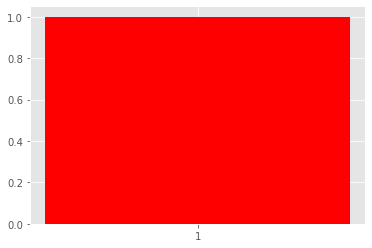

In [3]:
import pandas as pd
import numpy as np
import processing

In [6]:
netflix_data = pd.read_csv('netflix_titles_enriched.csv')
df = pd.DataFrame(netflix_data);
netflix_data = df.fillna('NONE', inplace = True);

In [4]:

# cast = {}
# ratings = {}
# country = {}

# (directors, director_titles_count) = processing.extract_directors_and_title_count(netflix_data)
# (directors, director_titles_count) = processing.remove_rows_containing_nan(directors, director_titles_count)

# for index, value in enumerate(df['cast']):
#     for member in list(str(value).split(', ')):
#         if member not in cast:
#             cast[member] = 1
#         else:
#             cast[member] +=1

# (ratings, ratings_count) = processing.extract_rating_and_title_count(df)
# (ratings, ratings_count) = processing.remove_rows_containing_nan(ratings, ratings_count)

In [5]:
# all_actors = list(cast.keys())
# actor_title_count = list(cast.values())

In [6]:
# directors[director_titles_count.index(max(director_titles_count))]
# director_titles_count[directors.index('Steven Spielberg')]

In [7]:
# import matplotlib.pyplot as plt
# import datetime as dt
# import processing

# add_dates = []
# all_dates = []


# for day in df["date_added"]:
#     if isinstance(day, str):
#         all_dates.append(processing.convert_date_to_datetime(day))

# for day in all_dates:
#     add_dates.append(dt.date.strftime(day, "%Y/%m/%d"))

# add_dates, tomatometer_score = zip(*sorted(zip(add_dates, list(df["rottentomatoes_tomatometer_score"]))))

# add_dates = list(add_dates)

# tomatometer_score = list(tomatometer_score)




# pl.plot(df["date_added"], df["rottentomatoes_tomatometer_score"])

In [7]:
import processing as pg
import plots
(ratings, counts) = pg.extract_rating_and_title_count(df)

(ratings, counts) = pg.remove_rows_containing_nan(ratings, counts)

(ratings, counts) = pg.sort_list_based_on_other(ratings, counts, greatest_to_least=True)

%matplotlib qt
plots.color_changer()
plots.pie_chart(ratings, counts, 20, 0)

['TV-MA', 'TV-14', 'TV-PG', 'R', 'TV-Y7', 'TV-Y', 'PG-13', 'TV-G', 'PG', 'NR', 'G', 'UR', 'TV-Y7-FV', 'NC-17']
[3571, 2493, 995, 665, 461, 411, 386, 269, 247, 98, 39, 12, 7, 3]


StopIteration: 

In [20]:
tomatoes = pg.remove_none_entries_one_dataframe_column(df['rottentomatoes_tomatometer_score'])
plots.plot_format()
plots.violin_plot(tomatoes, x_title="", y_title="Tomatometer Score", graph_title= "Critic Ratings of Netflix Offerings")

TypeError: violin_plot() missing 2 required positional arguments: 'data' and 'conditional'

In [21]:
differences = pg.find_year_difference(df["date_added"], df["release_year"])

count = 0
for difference in differences:
    if difference ==-1:
        count +=1
print(count)

difference_dict = {}
for difference in differences:
    if difference not in difference_dict:
        difference_dict[difference] = 1
    else:
        difference_dict[difference] += 1

differences = list(difference_dict.keys())

difference_counts = list(difference_dict.values())

(difference_counts, differences) = pg.sort_list_based_on_other(difference_counts, differences)

plots.bar_graph(x_data=differences[3:], y_data=difference_counts[3:], x_label="Time (Years)", graph_title = "Time After Release that Netflix Shows are Added")

28
[1, 2, 28, 3695, 1871, 764, 482, 395, 261, 256, 191, 177, 148, 127, 127, 92, 104, 91, 59, 59, 57, 62, 28, 34, 46, 36, 35, 25, 41, 17, 19, 14, 17, 11, 10, 6, 9, 17, 8, 8, 14, 11, 9, 9, 18, 3, 10, 11, 6, 9, 4, 2, 7, 9, 4, 4, 8, 2, 4, 1, 3, 2, 1, 1, 2, 2, 2, 1, 2, 3, 3, 3, 2, 1]


In [22]:
MA_ratings = pg.find_cases_and_pull_from_other_column(df, "rating", "TV-MA", "rottentomatoes_tomatometer_score")
MA_ratings = pg.remove_none_entries_one_list(MA_ratings)
plots.violin_plot(MA_ratings, x_title= "", y_title="Tomatometer Score", graph_title = "Tomatometer Scores for Title Rated TV-MA")

TypeError: violin_plot() missing 2 required positional arguments: 'data' and 'conditional'

In [33]:
pg.critics_vs_audience_scores(df)

ValueError: arrays must all be same length